<a href="https://colab.research.google.com/github/Atreyee-Paul/Machine-Learning/blob/main/Project3_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart-disease.csv')

In [4]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# print last 5 rows of dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of target variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [11]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [12]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [13]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the data into Training data and Test data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

Logistic Regression

In [32]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, pred))

Logistic Regression Accuracy: 0.8048780487804879


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(Y_test, pred))
print("\nClassification Report:")
print(classification_report(Y_test, pred))


Logistic Regression Confusion Matrix:
[[73 27]
 [13 92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.77      0.88      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_scaled, Y, cv=5)
print("Logistic Regression Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

Logistic Regression Cross-validation scores: [0.88292683 0.85365854 0.86341463 0.82439024 0.80487805]
Average CV Score: 0.8458536585365855


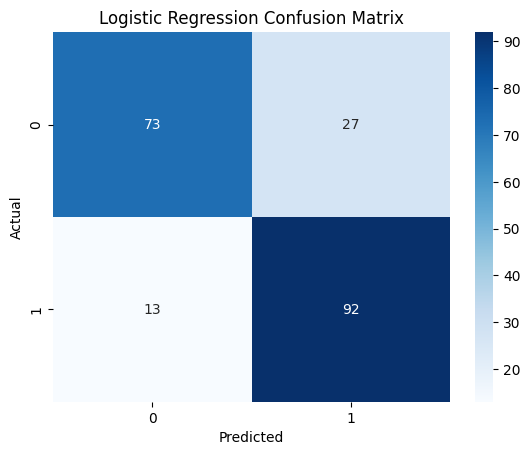

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))

Random Forest Accuracy: 1.0


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(Y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(Y_test, rf_pred))


Random Forest Confusion Matrix:
[[100   0]
 [  0 105]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_scaled, Y, cv=5)
print("Random Forest Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

Random Forest Cross-validation scores: [1.         1.         1.         0.98536585 0.98536585]
Average CV Score: 0.9941463414634146


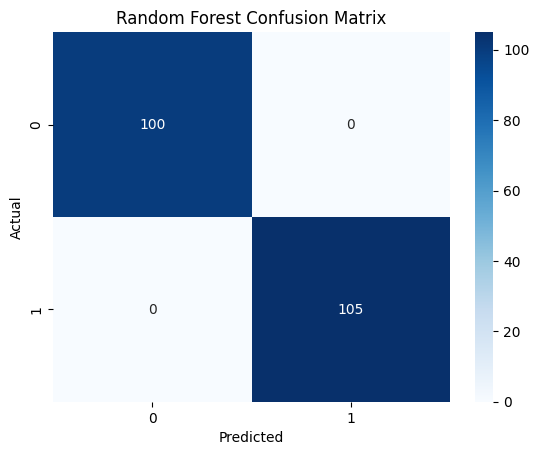

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

SVC

In [20]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))

SVM Accuracy: 0.9121951219512195


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nSVM Confusion Matrix:")
print(confusion_matrix(Y_test, svm_pred))
print("\nClassification Report:")
print(classification_report(Y_test, svm_pred))


SVM Confusion Matrix:
[[90 10]
 [ 8 97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.91      0.92      0.92       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X_scaled, Y, cv=5)
print("SVM Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

SVM Cross-validation scores: [0.95609756 0.95121951 0.93170732 0.89756098 0.87317073]
Average CV Score: 0.921951219512195


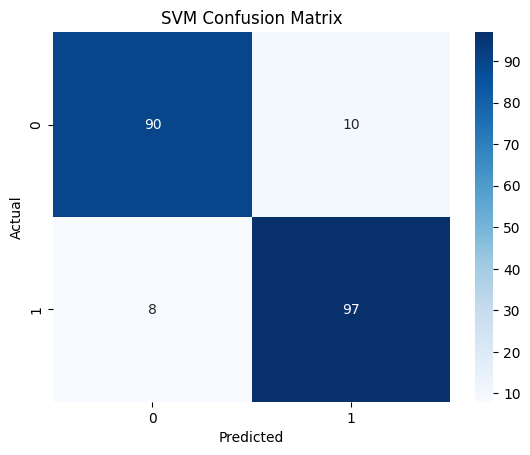

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [38]:
# Summary of all model accuracies
print("\nModel Accuracy Summary:")
print(f"Logistic Regression Accuracy: {accuracy_score(Y_test, pred):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(Y_test, rf_pred):.4f}")
print(f"SVM Accuracy: {accuracy_score(Y_test, svm_pred):.4f}")


Model Accuracy Summary:
Logistic Regression Accuracy: 0.8049
Random Forest Accuracy: 1.0000
SVM Accuracy: 0.9122


Building a Predictive System

Among all tested models, **SVM** provided the best generalization with an accuracy of **91.2%**, outperforming Logistic Regression and Random Forest (which overfit). Hence, it was used for building the predictive system.


In [39]:
input_str = input("Enter the array of data:")
input_data = [float(i) for i in input_str.split(',')]

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#SVM found to be the best
prediction = svm_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have Heart Disease')
else:
  print('The person has Heart Disease')

Enter the array of data:55,1,0,130,250,0,1,140,0,1.5,2,0,2
[1]
The person has Heart Disease
